# Exercise 3 - EDA MPG dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = sns.load_dataset('mpg')

In [4]:
with pd.option_context('display.max_rows', 5, 
                       'display.max_columns', None):
    display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## Exploratory Data Analysis & Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [8]:
df['origin'] = df['origin'].astype('category')

In [9]:
df['name'].value_counts().sort_index()

name
amc ambassador brougham                 1
amc ambassador dpl                      1
amc ambassador sst                      1
amc concord                             2
amc concord d/l                         1
amc concord dl                          1
amc concord dl 6                        1
amc gremlin                             4
amc hornet                              4
amc hornet sportabout (sw)              1
amc matador                             5
amc matador (sw)                        2
amc pacer                               1
amc pacer d/l                           1
amc rebel sst                           1
amc spirit dl                           1
audi 100 ls                             1
audi 100ls                              2
audi 4000                               1
audi 5000                               1
audi 5000s (diesel)                     1
audi fox                                1
bmw 2002                                1
bmw 320i                     

In [10]:
df[['make', 'model']] = df['name'].str.split(n=1, expand=True)

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


In [12]:
df['make'].value_counts().sort_index()

make
amc              28
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             51
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           5
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: count, dtype: int64

In [15]:
fix_typos = {
    'capri': 'ford',
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet',
    'maxda': 'mazda',
    'mercedes-benz': 'mercedes',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['make'] = df['make'].replace(fix_typos)

In [16]:
df['make'].value_counts().sort_index()

make
amc           28
audi           7
bmw            2
buick         17
cadillac       2
chevrolet     47
chrysler       6
datsun        23
dodge         28
fiat           8
ford          52
hi             1
honda         13
mazda         12
mercedes       3
mercury       11
nissan         1
oldsmobile    10
opel           4
peugeot        8
plymouth      31
pontiac       16
renault        5
saab           4
subaru         4
toyota        26
triumph        1
volkswagen    22
volvo          6
Name: count, dtype: int64

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


### Remove rows with missing values

In [19]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
make            False
model            True
dtype: bool

In [20]:
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto,ford,pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick,ford,maverick
150,26.0,4,108.0,93.0,2391,15.5,74,japan,subaru,subaru,None
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe,renault,lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra,ford,mustang cobra
346,32.3,4,97.0,67.0,2065,17.8,81,japan,subaru,subaru,None
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i,renault,18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl,amc,concord dl


In [21]:
df.dropna(subset='horsepower', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   make          392 non-null    object  
 10  model         390 non-null    object  
dtypes: category(1), float64(4), int64(3), object(3)
memory usage: 34.2+ KB


## Analysis

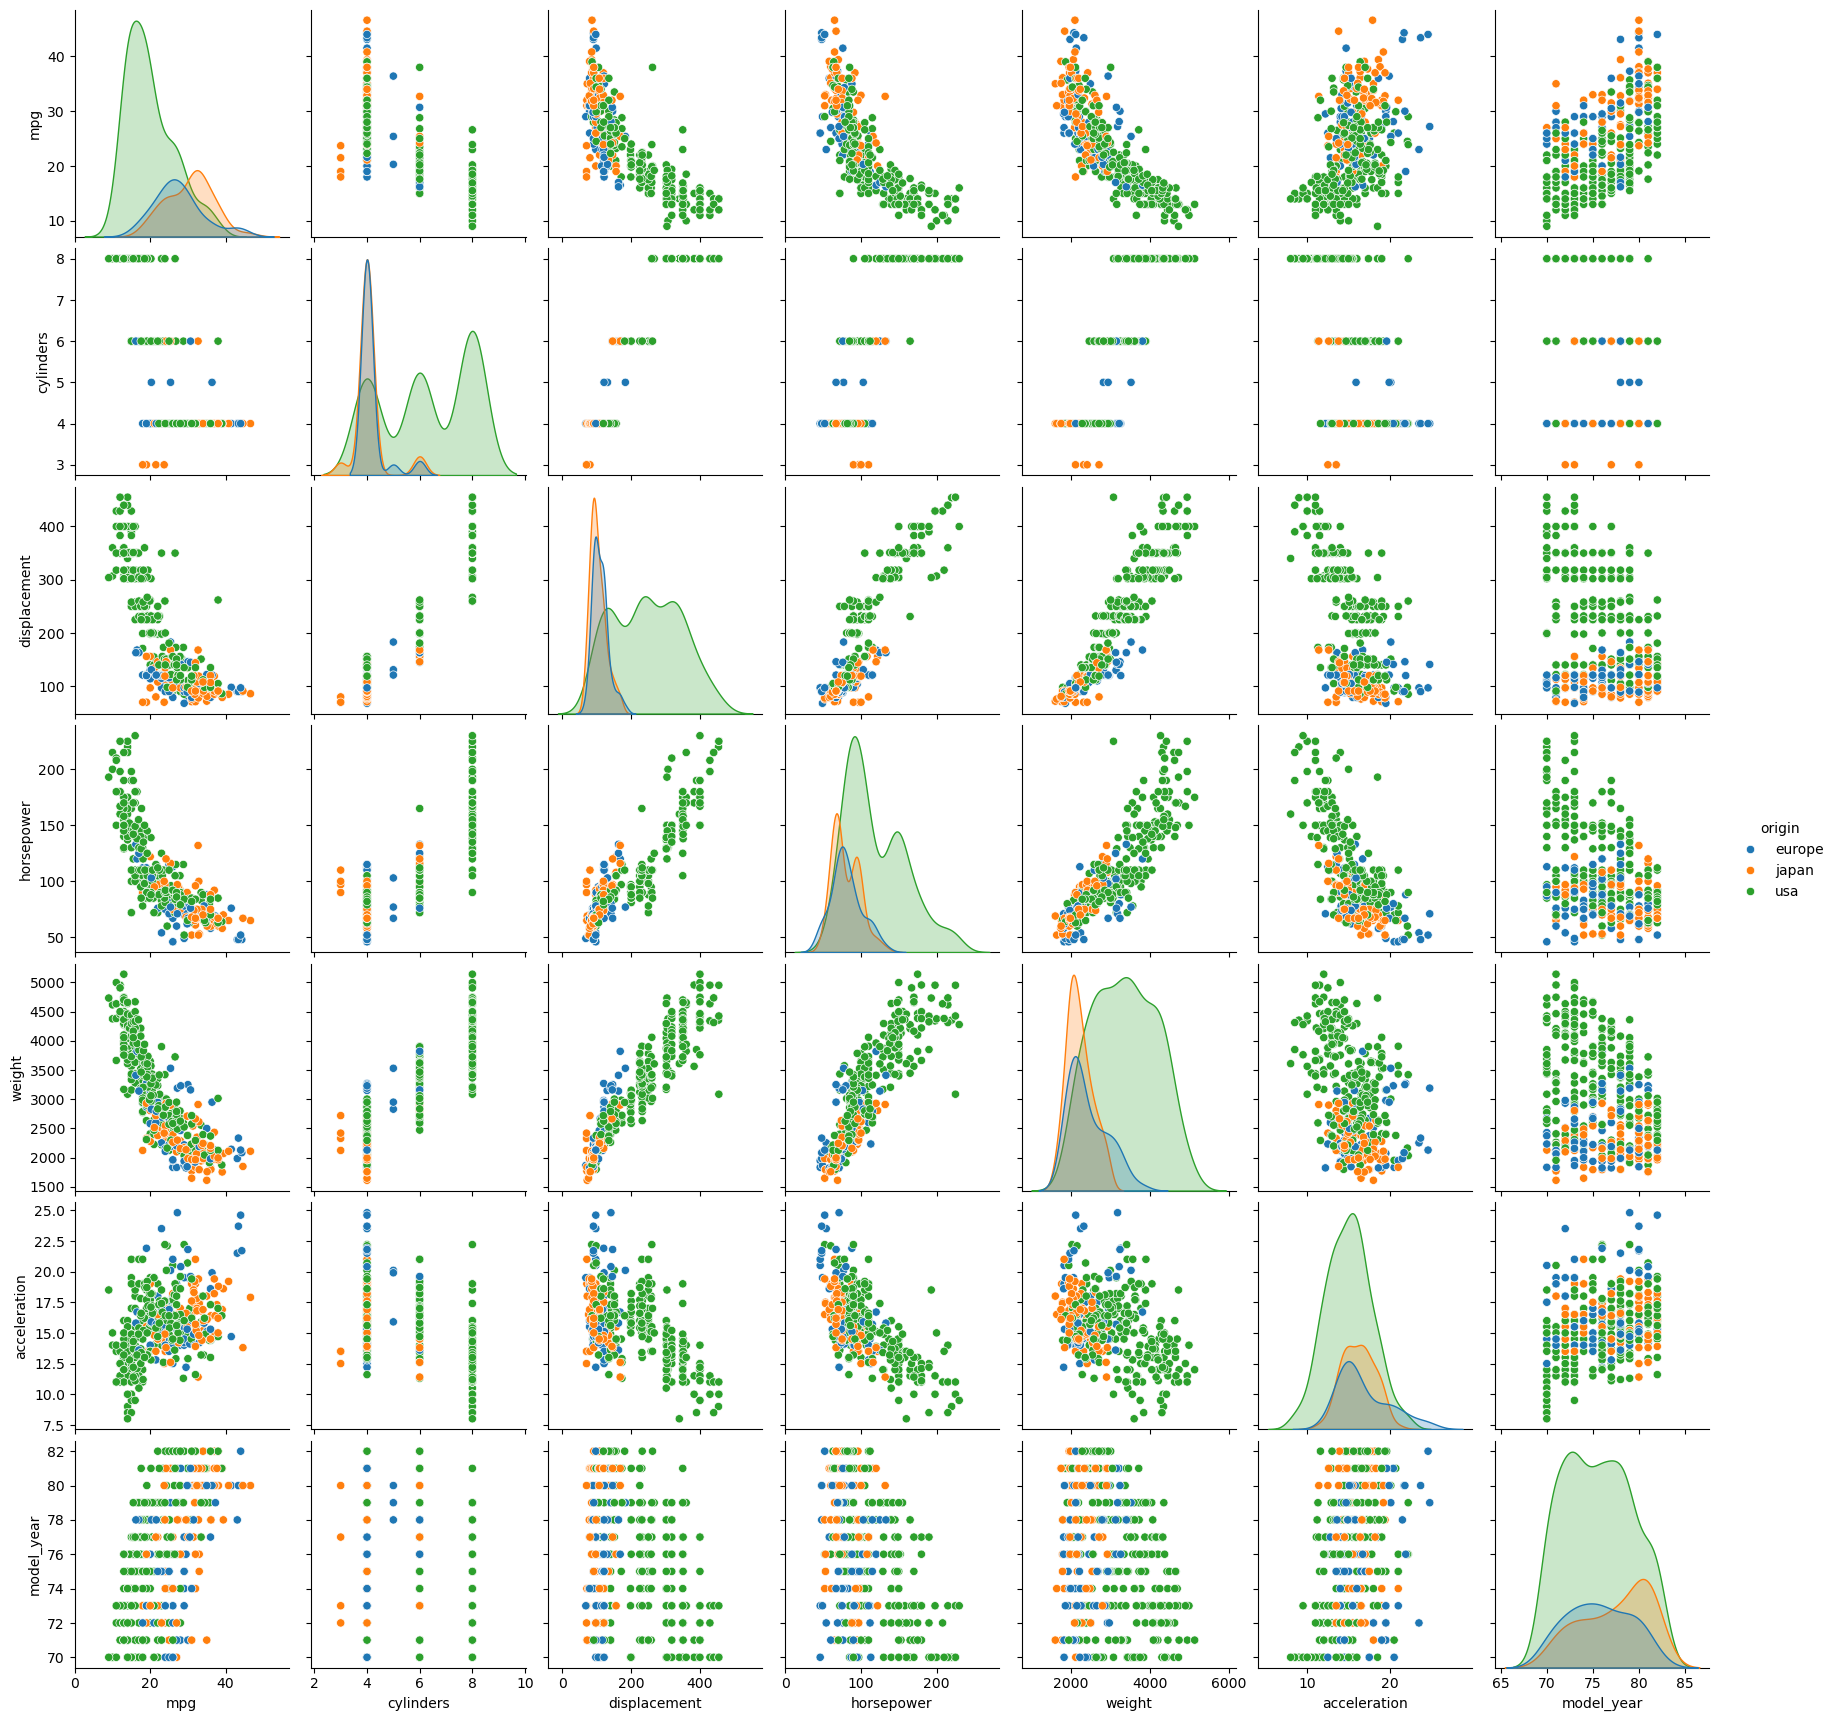

In [22]:
sns.pairplot(data=df, hue='origin');

<Axes: >

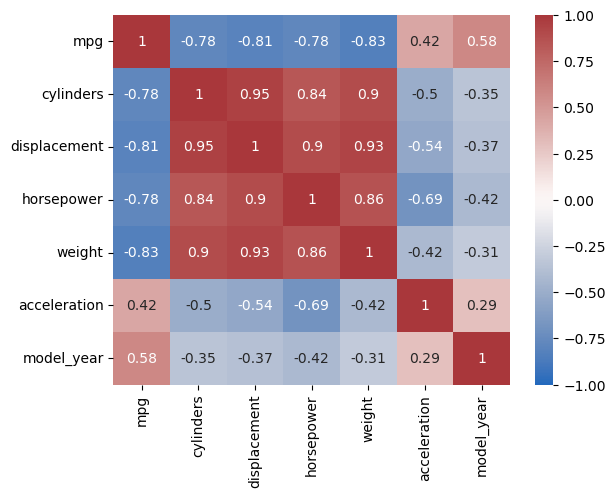

In [23]:
df_num = df.select_dtypes(['int','float'])
df_corr = df_num.corr()
sns.heatmap(data = df_corr, annot=True, cmap='vlag', vmin=-1, vmax=1, fmt='.2g')

In [29]:
df.nsmallest(5, 'mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
28,9.0,8,304.0,193.0,4732,18.5,70,usa,hi 1200d,hi,1200d
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250,ford,f250
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20,chevrolet,c20
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200,dodge,d200
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis,mercury,marquis


In [31]:
df.nlargest(5, 'mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,mazda,glc
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl,honda,civic 1500 gl
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel),volkswagen,rabbit c (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,volkswagen,pickup
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel),volkswagen,dasher (diesel)


In [32]:
df['kml'] = (df['mpg'] * 1.609344 / 4.54609).round(1)

In [33]:
df[['mpg', 'kml']].sort_values('mpg').head()

,mpg,kml
28,9.0,3.2
26,10.0,3.5
25,10.0,3.5
27,11.0,3.9
124,11.0,3.9


In [34]:
bins = [0, 2500, 3500, 6000]
labels = ['light','medium','heavy']
df['weight_class'] = pd.cut(df['weight'], bins, labels = labels)

In [35]:
df['weight_class'].value_counts()

weight_class
light     144
medium    139
heavy     109
Name: count, dtype: int64

In [36]:
df.pivot_table(index = 'origin', 
               columns = 'weight_class', 
               aggfunc = 'size',
               values = 'mpg',
               fill_value = 0,
               observed = True)

weight_class,light,medium,heavy
origin,,,
europe,43,23,2
japan,62,17,0
usa,39,99,107


In [37]:
df.groupby('origin')[['weight','horsepower']].mean()

,weight,horsepower
origin,,
europe,2433.470588,80.558824
japan,2221.227848,79.835443
usa,3372.489796,119.048980


In [38]:
totals = df.groupby('origin')[['mpg','weight']].agg(['size', 'min','max','mean','median']).round(1)
totals

mpg                          weight                            
       size   min   max  mean median   size   min   max    mean  median
origin                                                                 
europe   68  16.2  44.3  27.6   26.0     68  1825  3820  2433.5  2240.0
japan    79  18.0  46.6  30.5   31.6     79  1613  2930  2221.2  2155.0
usa     245   9.0  39.0  20.0   18.5    245  1800  5140  3372.5  3381.0

<Axes: xlabel='origin'>

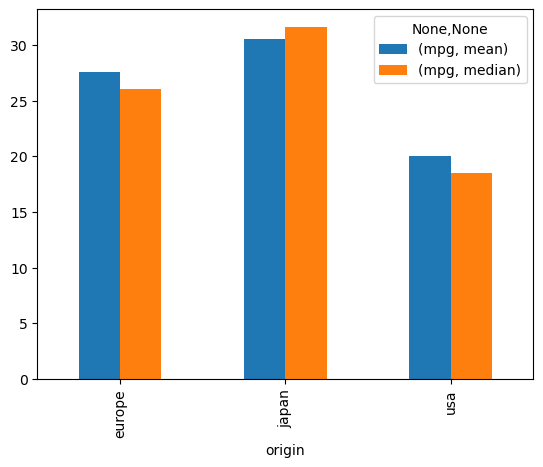

In [39]:
totals[[('mpg','mean'), ('mpg','median')]].plot.bar()

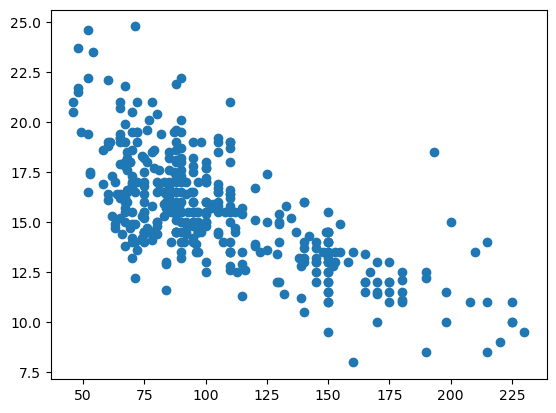

In [48]:
plt.scatter(df['horsepower'], df['acceleration'])
plt.show()

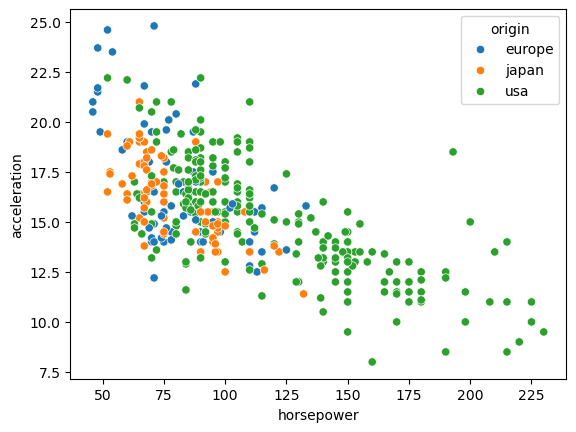

In [49]:
sns.scatterplot(data=df, x='horsepower', y='acceleration', hue='origin');

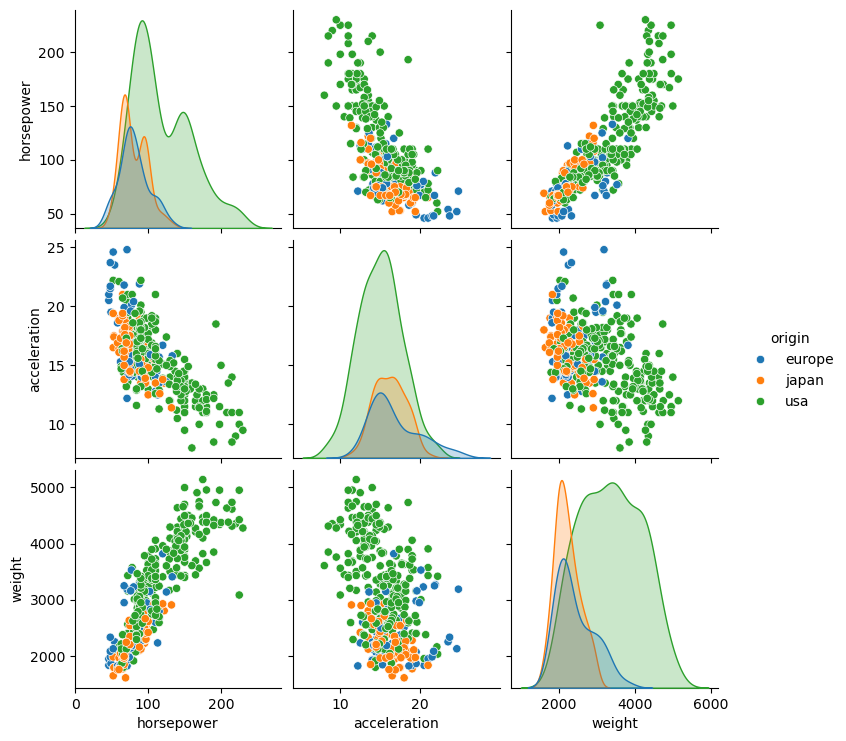

In [50]:
sns.pairplot(df[['horsepower','acceleration','weight','origin']], hue='origin');

In [77]:
df.sort_values('horsepower', ascending = False).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model,kml,weight_class
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix,pontiac,grand prix,5.7,heavy
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom,buick,electra 225 custom,4.2,heavy
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw),buick,estate wagon (sw),5.0,medium
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,pontiac,catalina,5.0,heavy
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,chevrolet,impala,5.0,heavy


In [78]:
df[df['origin']=='usa'].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model,kml,weight_class
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,6.4,medium
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320,5.3,medium
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite,6.4,medium
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst,5.7,medium
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino,6.0,medium


In [80]:
df[ df['make']=='ford' ].head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make,model,kml,weight_class
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino,6.0,medium
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,ford,galaxie 500,5.3,heavy
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick,ford,maverick,7.4,medium
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250,ford,f250,3.5,heavy
36,19.0,6,250.0,88.0,3302,15.5,71,usa,ford torino 500,ford,torino 500,6.7,medium
40,14.0,8,351.0,153.0,4154,13.5,71,usa,ford galaxie 500,ford,galaxie 500,5.0,heavy
43,13.0,8,400.0,170.0,4746,12.0,71,usa,ford country squire (sw),ford,country squire (sw),4.6,heavy
48,18.0,6,250.0,88.0,3139,14.5,71,usa,ford mustang,ford,mustang,6.4,medium
61,21.0,4,122.0,86.0,2226,16.5,72,usa,ford pinto runabout,ford,pinto runabout,7.4,medium
65,14.0,8,351.0,153.0,4129,13.0,72,usa,ford galaxie 500,ford,galaxie 500,5.0,heavy


In [81]:
df[ ['origin','make','model'] ].head(20)

,origin,make,model
0,usa,chevrolet,chevelle malibu
1,usa,buick,skylark 320
2,usa,plymouth,satellite
3,usa,amc,rebel sst
4,usa,ford,torino
5,usa,ford,galaxie 500
6,usa,chevrolet,impala
7,usa,plymouth,fury iii
8,usa,pontiac,catalina
9,usa,amc,ambassador dpl


In [82]:
df.loc[ df['make']=='ford', ['origin','make','model'] ].head(20)

,origin,make,model
4,usa,ford,torino
5,usa,ford,galaxie 500
17,usa,ford,maverick
25,usa,ford,f250
36,usa,ford,torino 500
40,usa,ford,galaxie 500
43,usa,ford,country squire (sw)
48,usa,ford,mustang
61,usa,ford,pinto runabout
65,usa,ford,galaxie 500


<Axes: >

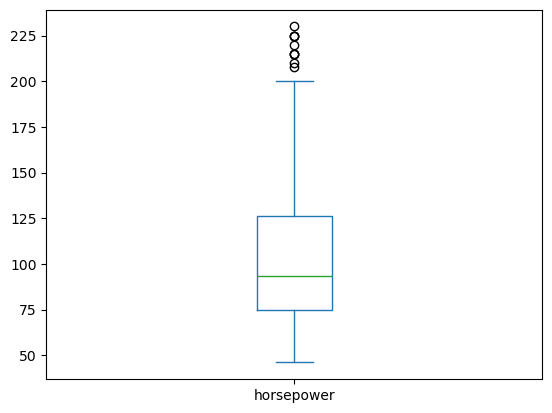

In [83]:
df['horsepower'].plot(kind='box')

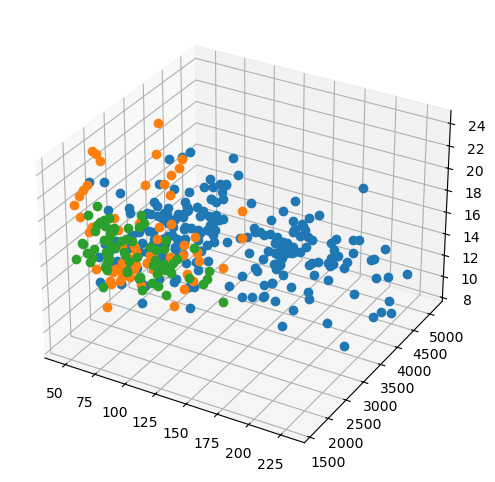

In [84]:
ax = plt.figure(figsize=(8, 6)).add_subplot(projection='3d')

dfx = df[df['origin']=='usa']
ax.plot(dfx['horsepower'], dfx['weight'], dfx['acceleration'], lw=0, marker='o')

dfx = df[df['origin']=='europe']
ax.plot(dfx['horsepower'], dfx['weight'], dfx['acceleration'], lw=0, marker='o')

dfx = df[df['origin']=='japan']
ax.plot(dfx['horsepower'], dfx['weight'], dfx['acceleration'], lw=0, marker='o')

plt.show()

## Categorical

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   make          392 non-null    object  
 10  model         390 non-null    object  
 11  kml           392 non-null    float64 
 12  weight_class  392 non-null    category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 37.8+ KB


In [86]:
df['origin'] = df['origin'].astype('category')

In [87]:
df['origin'].cat.categories

Index(['europe', 'japan', 'usa'], dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
 9   make          392 non-null    object  
 10  model         390 non-null    object  
 11  kml           392 non-null    float64 
 12  weight_class  392 non-null    category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 37.8+ KB


In [89]:
bins = [0, 2000, 4000, 6000]
labels = ['light', 'medium', 'heavy']
df['weight_class'] = pd.cut(df['weight'], bins, labels = labels)

In [90]:
df['weight_class'].value_counts()

weight_class
medium    285
heavy      64
light      43
Name: count, dtype: int64

In [92]:
df.pivot_table(index = 'origin', 
               columns = 'weight_class', 
               aggfunc = 'mean',
               values = 'mpg',
               fill_value = '-',
               observed = False)

weight_class,light,medium,heavy
origin,,,
europe,30.612500,26.676923,-
japan,34.413043,28.823214,-
usa,34.200000,21.935028,13.889062


In [93]:
pd.crosstab(index = df['origin'], 
            columns = df['weight_class'],
            values = df['mpg'],
            aggfunc = 'mean'
           ).fillna('-')

weight_class,light,medium,heavy
origin,,,
europe,30.612500,26.676923,-
japan,34.413043,28.823214,-
usa,34.200000,21.935028,13.889062


In [94]:
df.set_index('name').head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,make,model,kml,weight_class
name,,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu,6.4,medium
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320,5.3,medium
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite,6.4,medium
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst,5.7,medium
ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino,6.0,medium
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa,ford,galaxie 500,5.3,heavy
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet,impala,5.0,heavy
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth,fury iii,5.0,heavy
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac,catalina,5.0,heavy


In [70]:
df_indexed = df.set_index(['origin', 'make', 'model']).sort_index()
df_indexed.head(20)

mpg  cylinders  displacement  horsepower  \
origin make     model                                                        
europe audi     100 ls           24.0          4         107.0        90.0   
                100ls            20.0          4         114.0        91.0   
                100ls            23.0          4         115.0        95.0   
                4000             34.3          4          97.0        78.0   
                5000             20.3          5         131.0       103.0   
                5000s (diesel)   36.4          5         121.0        67.0   
                fox              29.0          4          98.0        83.0   
       bmw      2002             26.0          4         121.0       113.0   
                320i             21.5          4         121.0       110.0   
       fiat     124 sport coupe  26.0          4          98.0        90.0   
                124 tc           26.0          4         116.0        75.0   
                124b             30.0          4          88.0        76.0   
                128              29.0          4          68.0        49.0   
                128              24.0          4          90.0        75.0   
                131              28.0          4         107.0        86.0   
                strada custom    37.3          4          91.0        69.0   
                x1.9             31.0          4          79.0        67.0   
       mercedes 240d             30.0          4         146.0        67.0   
                280s             16.5          6         168.0       120.0   
                benz 300d        25.4          5         183.0        77.0   

                                 weight  acceleration  model_year  \
origin make     model                                               
europe audi     100 ls             2430          14.5          70   
                100ls              2582          14.0          73   
                100ls              2694          15.0          75   
                4000               2188          15.8          80   
                5000               2830          15.9          78   
                5000s (diesel)     2950          19.9          80   
                fox                2219          16.5          74   
       bmw      2002               2234          12.5          70   
                320i               2600          12.8          77   
       fiat     124 sport coupe    2265          15.5          73   
                124 tc             2246          14.0          74   
                124b               2065          14.5          71   
                128                1867          19.5          73   
                128                2108          15.5          74   
                131                2464          15.5          76   
                strada custom      2130          14.7          79   
                x1.9               2000          16.0          74   
       mercedes 240d               3250          21.8          80   
                280s               3820          16.7          76   
                benz 300d          3530          20.1          79   

                                                 name   kml weight_class  
origin make     model                                                     
europe audi     100 ls                    audi 100 ls   8.5       medium  
                100ls                      audi 100ls   7.1       medium  
                100ls                      audi 100ls   8.1       medium  
                4000                        audi 4000  12.1       medium  
                5000                        audi 5000   7.2       medium  
                5000s (diesel)    audi 5000s (diesel)  12.9       medium  
                fox                          audi fox  10.3       medium  
       bmw      2002                         bmw 2002   9.2       medium  
                320i                         bmw

In [96]:
df_indexed.loc['usa'].head(20)

mpg  cylinders  displacement  horsepower  \
make model                                                               
amc  ambassador brougham     13.0          8         360.0       175.0   
     ambassador dpl          15.0          8         390.0       190.0   
     ambassador sst          17.0          8         304.0       150.0   
     concord                 19.4          6         232.0        90.0   
     concord                 24.3          4         151.0        90.0   
     concord d/l             18.1          6         258.0       120.0   
     concord dl 6            20.2          6         232.0        90.0   
     gremlin                 21.0          6         199.0        90.0   
     gremlin                 19.0          6         232.0       100.0   
     gremlin                 18.0          6         232.0       100.0   
     gremlin                 20.0          6         232.0       100.0   
     hornet                  18.0          6         199.0        97.0   
     hornet                  18.0          6         232.0       100.0   
     hornet                  19.0          6         232.0       100.0   
     hornet                  22.5          6         232.0        90.0   
     hornet sportabout (sw)  18.0          6         258.0       110.0   
     matador                 18.0          6         232.0       100.0   
     matador                 14.0          8         304.0       150.0   
     matador                 16.0          6         258.0       110.0   
     matador                 15.0          6         258.0       110.0   

                             weight  acceleration  model_year  \
make model                                                      
amc  ambassador brougham       3821          11.0          73   
     ambassador dpl            3850           8.5          70   
     ambassador sst            3672          11.5          72   
     concord                   3210          17.2          78   
     concord                   3003          20.1          80   
     concord d/l               3410          15.1          78   
     concord dl 6              3265          18.2          79   
     gremlin                   2648          15.0          70   
     gremlin                   2634          13.0          71   
     gremlin                   2789          15.0          73   
     gremlin                   2914          16.0          75   
     hornet                    2774          15.5          70   
     hornet                    2945          16.0          73   
     hornet                    2901          16.0          74   
     hornet                    3085          17.6          76   
     hornet sportabout (sw)    2962          13.5          71   
     matador                   3288          15.5          71   
     matador                   3672          11.5          73   
     matador                   3632          18.0          74   
     matador                   3730          19.0          75   

                                                   name  kml weight_class  
make model                                                                 
amc  ambassador brougham        amc ambassador brougham  4.6       medium  
     ambassador dpl                  amc ambassador dpl  5.3       medium  
     ambassador sst                  amc ambassador sst  6.0       medium  
     concord                                amc concord  6.9       medium  
     concord                                amc concord  8.6       medium  
     concord d/l                        amc concord d/l  6.4       medium  
     concord dl 6                      amc concord dl 6  7.2       medium  
     gremlin                                amc gremlin  7.4       medium  
     gremlin                                amc gremlin  6.7       medium  
     gremlin                                amc gremlin  6.4       medium  
     gremlin                                amc gremlin  7

In [118]:
df[['make','weight']].groupby('make').agg('mean').astype('int').sort_values('weight')

,weight
make,
honda,2023
volkswagen,2045
renault,2074
fiat,2143
subaru,2146
nissan,2160
opel,2200
mazda,2235
datsun,2242


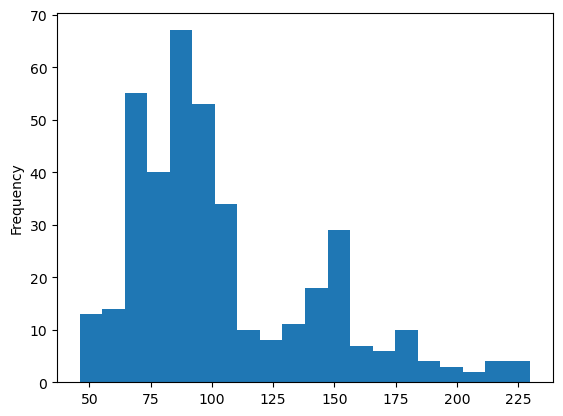

In [98]:
df['horsepower'].plot(kind='hist', bins=20)
plt.show()

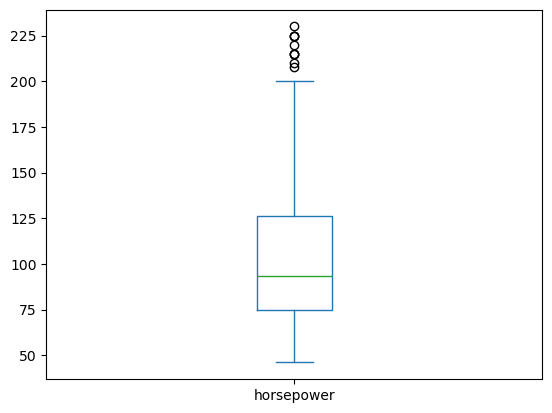

In [99]:
df['horsepower'].plot(kind='box')
plt.show()

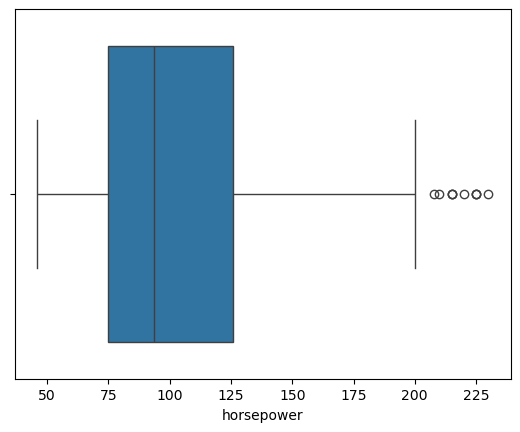

In [100]:
sns.boxplot(data=df, x='horsepower');

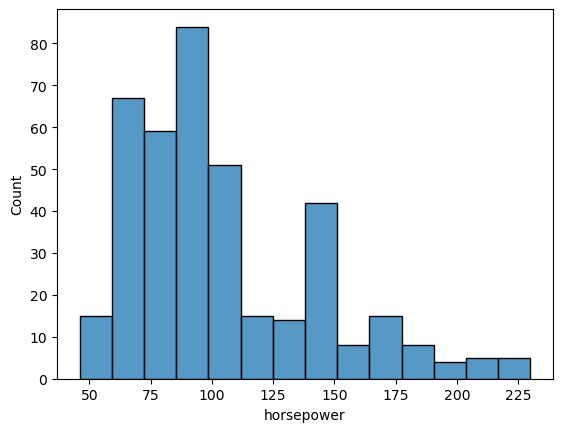

In [101]:
sns.histplot(data=df, x='horsepower');

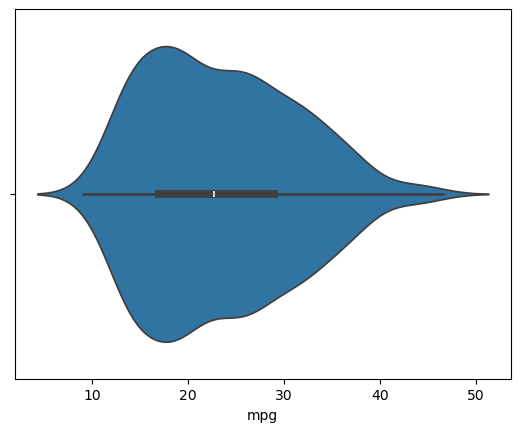

In [102]:
sns.violinplot(data=df, x='mpg');

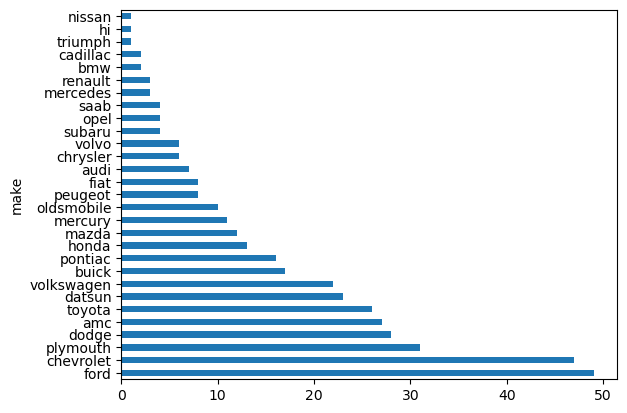

In [103]:
df['make'].value_counts().plot(kind='barh')
plt.show()